In [4]:
with open("most_used_words.txt") as file:
    words = file.read().split()
words[:10]

['the', 'of', 'and', 'to', 'in', 'a', 'is', 'that', 'for', 'it']

In [6]:
chars = sorted(set(".".join(words)))
atoi = {a:i for i,a in enumerate(chars)}
itoa = {i:a for i,a in enumerate(chars)}

In [94]:
import torch
N = torch.zeros([27, 27], dtype=torch.int32) + 1

In [95]:
for word in words:
    for x, y in zip("."+word, word+"."):
        N[atoi[x]][atoi[y]] += 1

In [96]:
probs = N / N.sum(1, keepdim=True)
probs.sum(1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])

(-0.5, 26.5, 26.5, -0.5)

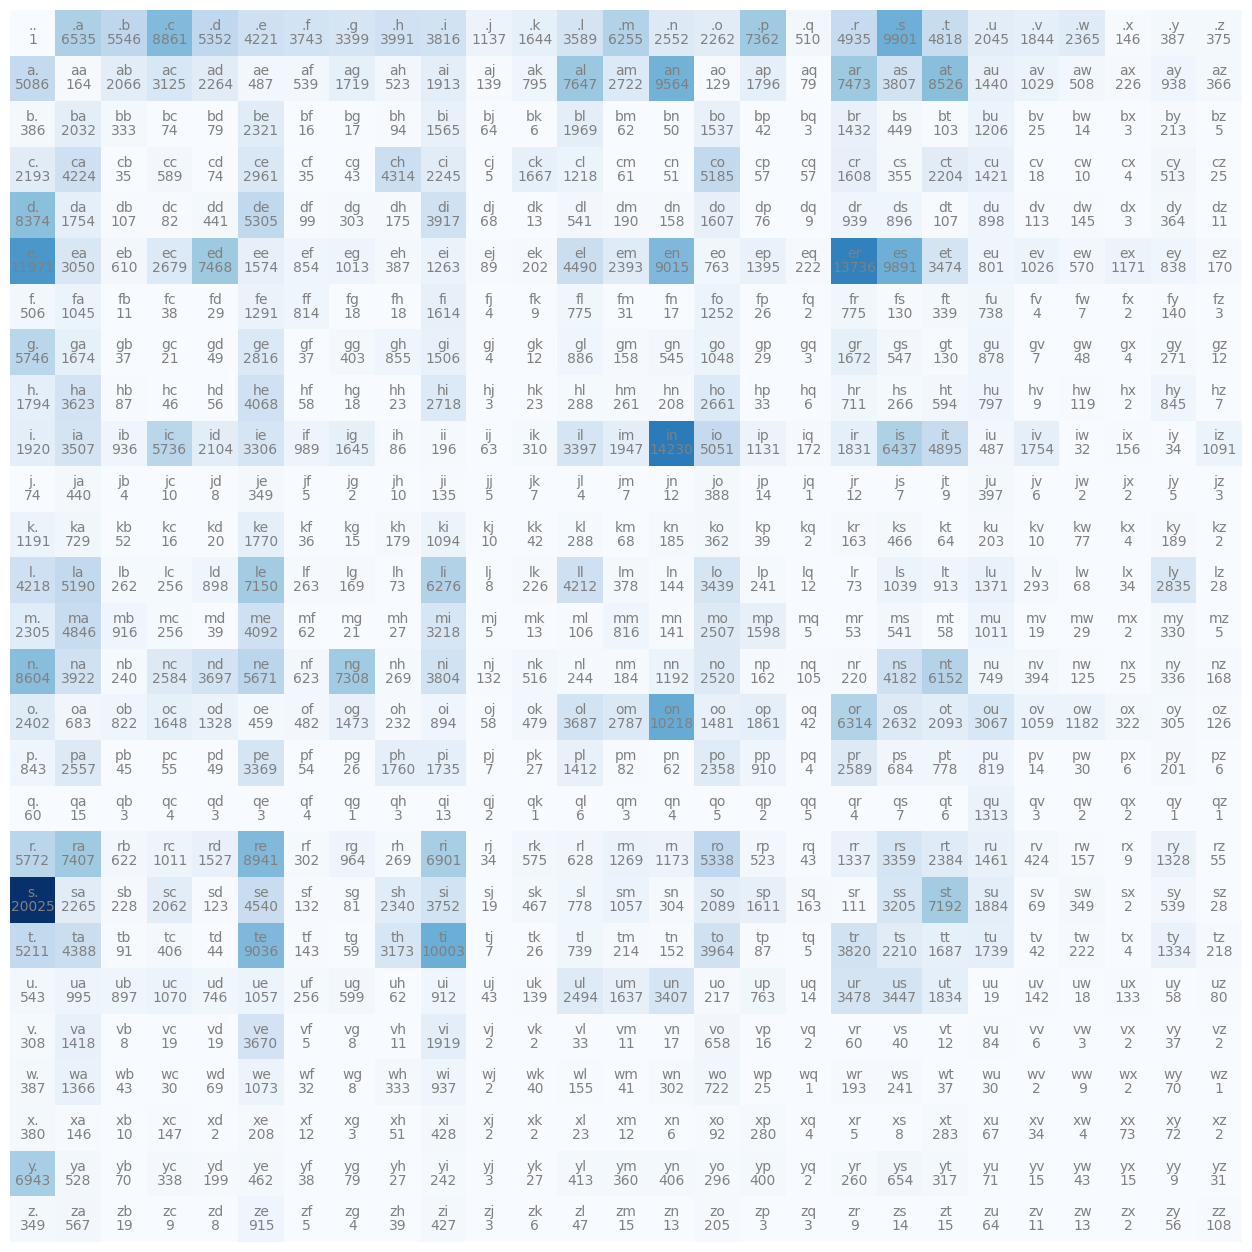

In [97]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16, 16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itoa[i] + itoa[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color="gray")
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color="gray")
plt.axis('off')

In [98]:
g = torch.Generator().manual_seed(37469124)
ix = 0
for _ in range(10):
    while True:
        prob = probs[ix]
        ix = torch.multinomial(prob, num_samples=1, replacement=True, generator=g).item()
        print(itoa[ix], end="")
        if(ix==0): break
    print()

lltendy.
barce.
chanjubi.
doarrecheds.
mericowa.
ralibrbicoplland.
ponestededlelploum.
bjers.
c.
se.


In [99]:
log_likelihood = 0.0
n = 0
for word in words:
    for x, y in zip(word, word[1:]+"."):
        prob = probs[atoi[x]][atoi[y]]
        n += 1
        log_likelihood += torch.log(prob)

print(log_likelihood)
print("loss =", -log_likelihood/n)

tensor(-1856470.7500)
loss = tensor(2.5049)
